# Decision Tree Implementation from Scratch

This notebook demonstrates how to implement a Decision Tree classifier from scratch. Decision Trees are versatile machine learning algorithms that can be used for both classification and regression tasks.

## Theory Overview

### Decision Tree Basics
A decision tree makes predictions by:
1. Splitting the data based on feature values
2. Creating a tree structure of decision nodes
3. Making predictions based on the majority class in leaf nodes

### Key Concepts
- **Information Gain**: Measures the reduction in entropy after a split
- **Entropy**: Measures the impurity/randomness in the dataset
- **Gini Index**: Alternative to entropy for measuring node impurity
- **Pruning**: Technique to prevent overfitting by limiting tree growth

### Advantages
- Easy to understand and interpret
- Can handle both numerical and categorical data
- Requires little data preprocessing
- Can model non-linear relationships

## 1. Setup and Imports

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

## 2. Decision Tree Node Implementation

First, we'll implement the Node class that will form our tree structure.

In [2]:
class Node:
    """
    A Decision Tree Node
    
    Attributes:
        feature_index: Index of the feature to split on
        threshold: Value to split the feature on
        left: Left child node
        right: Right child node
        value: Predicted value (for leaf nodes)
        info_gain: Information gain from this split
    """
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None
        self.info_gain = None

## 3. Decision Tree Classifier Implementation

We'll implement the Decision Tree classifier with the following key methods:
- Entropy calculation
- Information gain computation
- Best split finding
- Tree building
- Prediction

In [3]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        """
        Initialize Decision Tree Classifier
        
        Parameters:
            max_depth: Maximum depth of the tree
            min_samples_split: Minimum samples required to split a node
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        
    def entropy(self, y):
        """Calculate entropy of the target variable"""
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p = len(y[y == cls]) / len(y)
            entropy -= p * np.log2(p)
        return entropy
    
    def information_gain(self, parent, left_child, right_child):
        """Calculate information gain from a split"""
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        gain = self.entropy(parent) - (
            weight_left * self.entropy(left_child) +
            weight_right * self.entropy(right_child)
        )
        return gain
    
    def best_split(self, X, y):
        """Find the best split for a node"""
        best_gain = -1
        best_split = None
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            thresholds = np.unique(feature_values)
            
            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask
                
                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue
                
                gain = self.information_gain(
                    y,
                    y[left_mask],
                    y[right_mask]
                )
                
                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'info_gain': gain
                    }
        
        return best_split
    
    def build_tree(self, X, y, depth=0):
        """Recursively build the decision tree"""
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Check stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or            n_samples < self.min_samples_split or            n_classes == 1:
            leaf_value = np.argmax(np.bincount(y))
            leaf = Node()
            leaf.value = leaf_value
            return leaf
        
        # Find best split
        best_split = self.best_split(X, y)
        if best_split is None:
            leaf_value = np.argmax(np.bincount(y))
            leaf = Node()
            leaf.value = leaf_value
            return leaf
        
        # Create node
        node = Node()
        node.feature_index = best_split['feature_index']
        node.threshold = best_split['threshold']
        node.info_gain = best_split['info_gain']
        
        # Split data
        left_mask = X[:, node.feature_index] <= node.threshold
        right_mask = ~left_mask
        
        # Build children
        node.left = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        node.right = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return node
    
    def fit(self, X, y):
        """Train the decision tree"""
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        self.root = self.build_tree(X, y)
        
    def predict_single(self, x, node):
        """Make prediction for a single sample"""
        if node.value is not None:
            return node.value
        
        if x[node.feature_index] <= node.threshold:
            return self.predict_single(x, node.left)
        return self.predict_single(x, node.right)
    
    def predict(self, X):
        """Make predictions for multiple samples"""
        return np.array([self.predict_single(x, self.root) for x in X])

## 4. Generate Synthetic Dataset

We'll create a simple 2D dataset for visualization purposes.

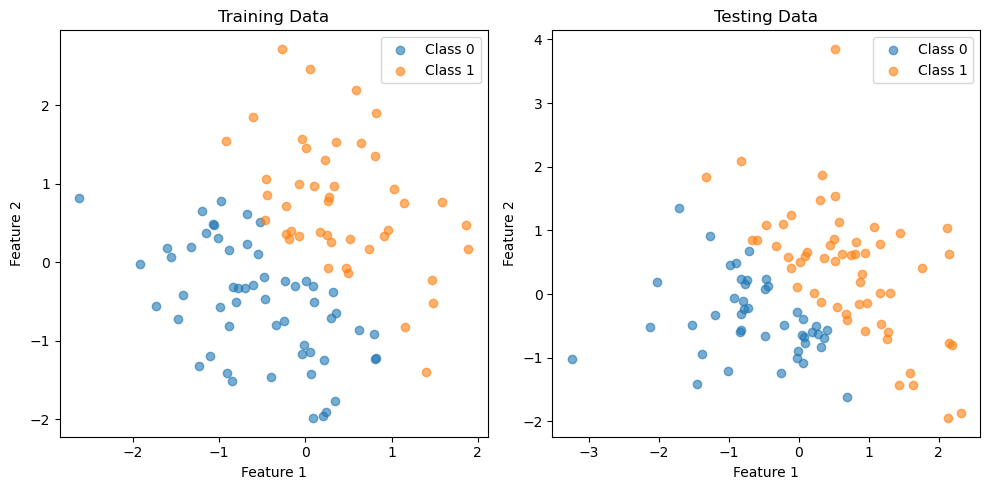

In [4]:
def generate_data(n_samples=100):
    """Generate synthetic classification data"""
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)
    return X, y

# Generate and split data
X, y = generate_data(n_samples=200)
split_idx = len(X) // 2
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Plot the data
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
           label='Class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
           label='Class 1', alpha=0.6)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(122)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 
           label='Class 0', alpha=0.6)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
           label='Class 1', alpha=0.6)
plt.title('Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Train and Evaluate the Model

Let's train our decision tree and evaluate its performance.

In [5]:
# Train the model
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# Make predictions
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Calculate accuracy
train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9400


## 6. Decision Boundary Visualization

Let's visualize the decision boundaries created by our tree.

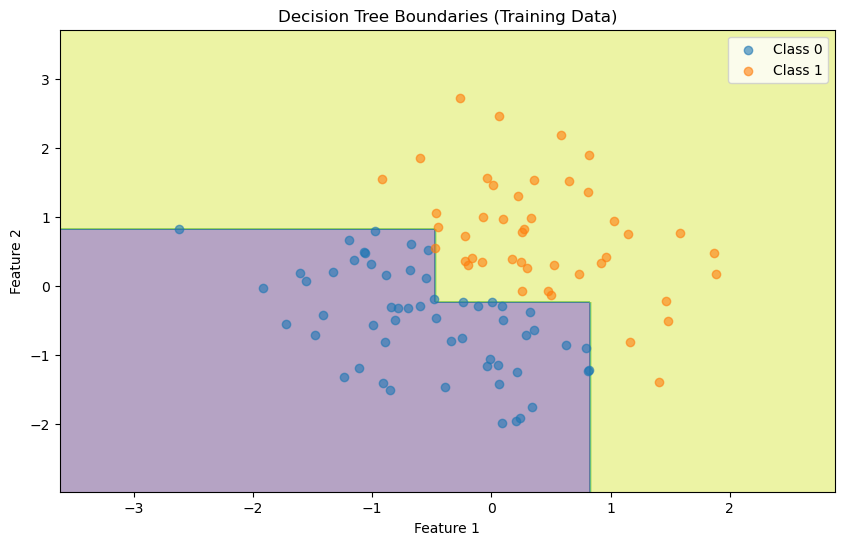

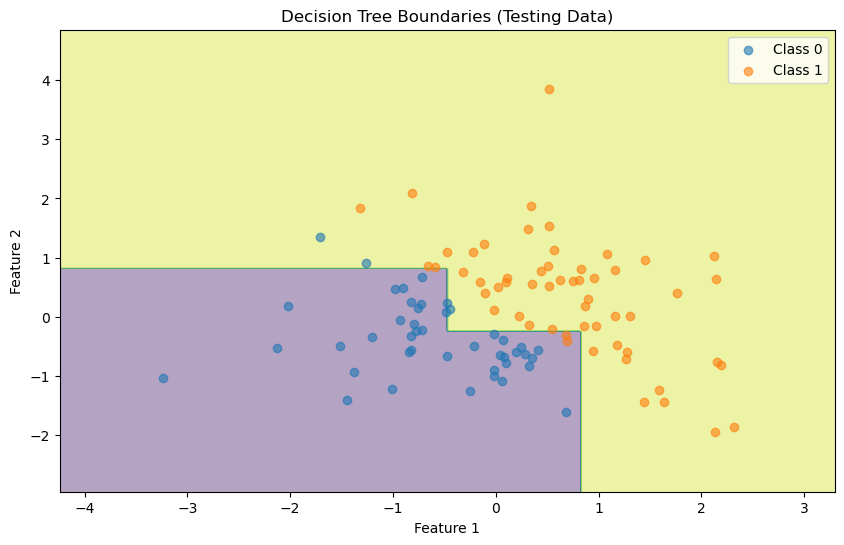

In [6]:
def plot_decision_boundary(model, X, y, title):
    """Plot decision boundary and data points"""
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 
               label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
               label='Class 1', alpha=0.6)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot decision boundaries
plot_decision_boundary(dt, X_train, y_train, 'Decision Tree Boundaries (Training Data)')
plot_decision_boundary(dt, X_test, y_test, 'Decision Tree Boundaries (Testing Data)')

## 7. Tree Structure Visualization

Finally, let's visualize the structure of our decision tree.

In [7]:
def visualize_tree(tree, filename='decision_tree'):
    """Visualize the decision tree using graphviz"""
    dot = Digraph(comment='Decision Tree')
    
    def add_nodes(node, node_id='0'):
        if node.value is not None:
            dot.node(node_id, f'Class: {node.value}')
            return
        
        dot.node(node_id, f'X[{node.feature_index}] <= {node.threshold:.2f}\nGain: {node.info_gain:.4f}')
        
        # Add left child
        left_id = f'{node_id}0'
        add_nodes(node.left, left_id)
        dot.edge(node_id, left_id, 'True')
        
        # Add right child
        right_id = f'{node_id}1'
        add_nodes(node.right, right_id)
        dot.edge(node_id, right_id, 'False')
    
    add_nodes(tree.root)
    dot.render(filename, view=True, format='png')

# Visualize the tree
visualize_tree(dt)